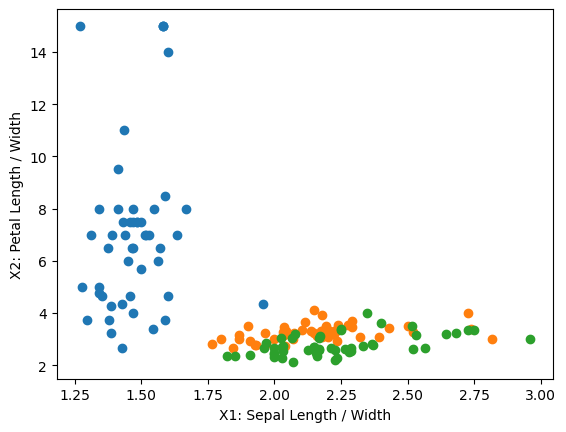

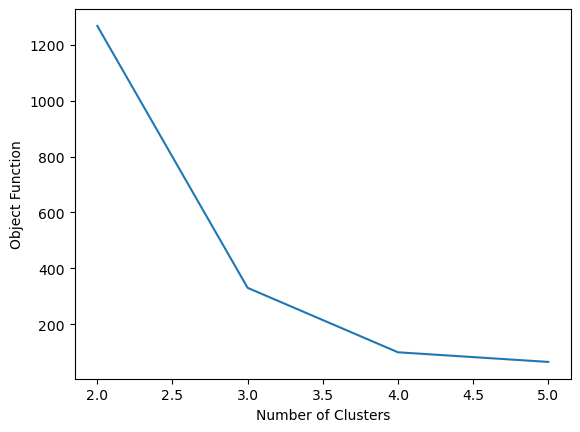

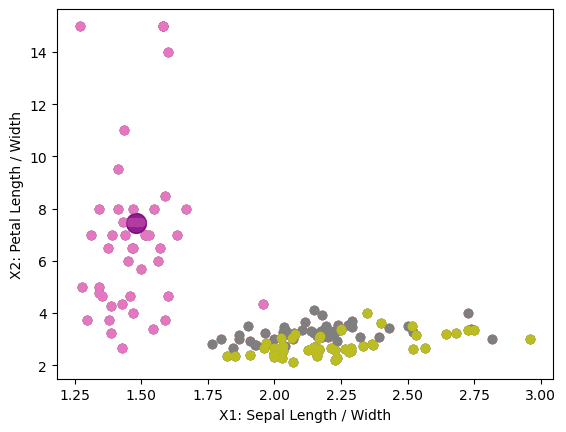

C:\Users\markb\AppData\Local\Temp\ipykernel_27388\990531504.py:78: RuntimeWarning: invalid value encountered in true_divide
  new_center[i] = S[i] / int(CT[i])


In [ ]:
import scipy as sp
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from numpy import linalg

# Assigns data to clusters
def assign_data2clusters(X, C):
    data_map = np.zeros((X.shape[0], C.shape[0]))
    for i in range(X.shape[0]):
        min_distance = float('inf')
        min_cluster_index = -1
        for j in range(C.shape[0]):
            distance = np.linalg.norm(X.iloc[i] - C[j]) * np.linalg.norm(X.iloc[i] - C[j])
            if distance < min_distance:
                min_distance = distance
                min_cluster_index = j
            else:
                distance2 = distance
        data_map[i] = [1 if index == min_cluster_index else 0 for index in range(C.shape[0])]
    return data_map

# the initialization algorithm
def k_init(X, k):
    centers = X.sample().values
    if k == 1:
        return centers
    data_points = X.values
    x = 0;
    while x < k-1:
        distances = []
        total_distance = 0
        indices = []
        y = 0
        while y < len(data_points):
            min_distance = float('inf')
            for j in range(len(centers)):
                if min_distance > np.linalg.norm(data_points[i] - centers[j]) * np.linalg.norm(data_points[i] - centers[j]):
                    min_distance = np.linalg.norm(data_points[i] - centers[j]) * np.linalg.norm(data_points[i] - centers[j])
            distances.append(min_distance)
            total_distance += min_distance
            y+=1;
        probabilities = [distances[i] / total_distance for i in range(len(data_points))]
        next_centroid_indices = np.random.choice(range(X.shape[0]), size = 1, p = probabilities)
        next_centroid = X.iloc[next_centroid_indices].values
        centers = np.vstack((centers, next_centroid))
        x+=1;
    return centers

# computes the clustering objective for x and c
def compute_object(X, C):
    object = 0
    for i in range(X.shape[0]):
        min_distance = float('inf')
        for j in range(1, C.shape[0]):
            if min_distance > np.linalg.norm(X.iloc[i, :] - C[j]) * np.linalg.norm(X.iloc[i, :] - C[j]):
                min_distance = np.linalg.norm(X.iloc[i, :] - C[j]) * np.linalg.norm(X.iloc[i, :] - C[j])
        object += min_distance
    return object

# this is the clustering algorithm, calls init, fixes assignments
def k_means_pp(X, k, max_iter):
    center = k_init(X, k)
    object = compute_objective(X, center)
    for _ in range(max_iter):
        S = np.zeros([k, X.shape[1]])
        CT = np.zeros(k)
        data_map = assign_data2clusters(X, center)
        for i in range(X.shape[0]):
            for j in range(k):
                if data_map[i][j] == 1:
                    S[j] = S[j] + X.iloc[i, :]
                    CT[j] = CT[j] + 1
        new_center = np.zeros([k, X.shape[1]])
        for i in range(k):
            new_center[i] = S[i] / int(CT[i])
        new_object = compute_object(X, new_center)
        if new_object < object:
            object = new_object
            center = new_center
    return center

#showing all the charts
data = pd.read_csv("iris.data")
data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
X1 = data['sepal_length'] / data['sepal_width']
X2 = data['petal_length'] / data['petal_width']
y = data['class']
train_data = pd.DataFrame()
train_data['x1'] = X1
train_data['x2'] = X2
for color, group in data.groupby("class"):
    plt.scatter(X1[group.index], X2[group.index], label = color)
plt.xlabel("X1: Sepal Length / Width")
plt.ylabel("X2: Petal Length / Width")
plt.show()
object = []
for i in range(1, 6):
    centers = k_means_pp(train_data, i, 49)
    object.append(compute_object(train_data, centers))
plt.plot([_ for _ in range(1,6)], object)
plt.xlabel("Number of Clusters")
plt.ylabel("Object Function")
plt.show()
centers = k_means_pp(train_data, 3, 49)
for C in centers:
    for color, group in data.groupby("class"):
        plt.scatter(X1[group.index], X2[group.index], label = color)
    plt.scatter(c[0], c[1], c='purple', s=200, alpha=0.5)
plt.xlabel("X1: Sepal Length / Width")
plt.ylabel("X2: Petal Length / Width")
plt.show()
obj1 = []
for i in range(1, 50):
    centers = k_means_pp(train_data, 3, i)
    obj1.append(compute_object(train_data, centers))
plt.plot([_ for _ in range(1, 50)], obj1)
plt.xlabel("Number of Iterations")
plt.ylabel("Object Function")
plt.show()